In [1]:
import sys
sys.path.append('../src')

In [2]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
import gta.recording.unified

In [4]:
# recording = gta.recording.unified.UnifiedRecorder(
#     includeKeyboard=False,
#     gamepadPeriod=.001, visionPeriod=.001
# )
# recording.start()
# time.sleep(10)

In [5]:
# recording.stop()

In [6]:
# X, Y, T = recording.XYT()

In [7]:
gpRecording = gta.recording.gamepad.GamepadRecorder(period=.001)
gpRecording.start()
time.sleep(10)

In [8]:
gpRecording.stop()

In [9]:
results = gpRecording.results

In [10]:
T = gpRecording.times
Y = np.zeros((T.size, int(results[:, 0].max()+1))).astype(float)
state = np.zeros((int(results[:, 0].max()+1,)))
for i, (eid, value) in enumerate(results):
    state[int(eid)] = value
    Y[i, :] = state

In [11]:
len(T)

270

In [12]:
import gta.gameInputs
reload(gta.gameInputs)

<module 'gta.gameInputs' from '../src\\gta\\gameInputs\\__init__.py'>

In [13]:
controlInputs = gta.gameInputs.ControlInputs()

In [14]:
# controlInputs.applyControlState([0, 0, 0, 0, 0, 1])

In [15]:
controlInputs.applyControlState([0, 0, 0, 0, 0, 0])

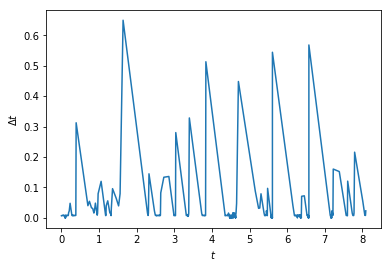

In [16]:
fig, ax = plt.subplots()
ax.plot(T[:-1] - T.min(), np.diff(T))
ax.set_xlabel('$t$')
ax.set_ylabel('$\Delta t$');

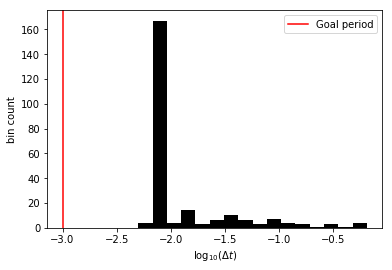

In [17]:
dt = np.diff(T)
fig, ax = plt.subplots()
ax.hist(np.log10(dt[dt != 0]), bins=16, color='black')
ax.set_xlabel('$\log_{10}(\Delta t)$')
ax.set_ylabel('bin count');
ax.axvline(np.log10(gpRecording.workerArgs[-1]), label='Goal period', color='red')
ax.legend();

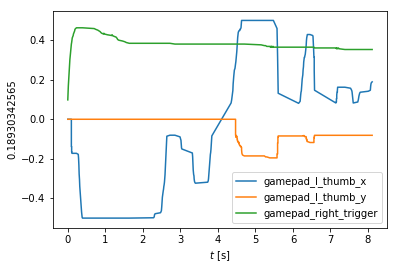

In [18]:
fig, ax = plt.subplots()
for i in 0, 1, 5:
    y = Y[:, i]
    ax.plot(T-T.min(), y, label=gta.eventIDs.eids2names[i])
ax.legend()
ax.set_ylabel(value)
ax.set_xlabel('$t$ [s]');

In [19]:
t0 = time.time()
tlast = 0
for t, y in zip(T-T.min(), Y):
    now = time.time() - t0
    if now <= t:
        d = t - now
        time.sleep(d)
        controlInputs.applyControlState(y)
    else:
        if t-tlast > 0:
            print('Skipped an input at t=%.2g (dt=%.2g)' % (t, t-tlast))
    tlast = t